In [12]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [13]:
#!pip3 install scikit-learn==1.3.2

In [14]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


## SVM

In [15]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

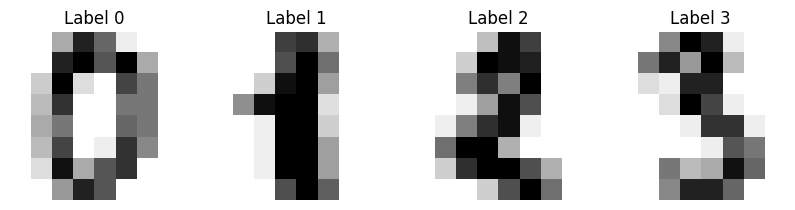

In [16]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [17]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [18]:
## 7a
from sklearn.svm import SVC

# Create and train the SVM model with RBF kernel
# rdf_kernel = SVC(kernel='rbf', gamma=0.0005, C=0.9, decision_function_shape='ovo')
rdf_kernel = SVC(kernel='rbf', gamma=0.0005, C=0.9)
rdf_kernel.fit(D_train, y_train)

# Make predictions on the test set
y_pred = rdf_kernel.predict(D_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 0.9555555555555556


In [19]:
## 7c
num_support_vectors = rdf_kernel.n_support_[0]
print(f'Number of support vectors for 0 vs 1: {num_support_vectors}')

Number of support vectors for 0 vs 1: 38


In [23]:
# 7d
rdf_kernel.support_vectors_[0].size

64

In [21]:
### 7e 

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.6, 0.8, 1, 2, 4],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Create the SVM model with RBF kernel
gen_red_kernel = SVC(kernel='rbf')

# Create GridSearchCV object with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(estimator=gen_red_kernel, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the entire dataset
grid_search.fit(D, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 4, 'gamma': 0.0005}
0.9744073042401734
